In [2]:
#Sources:https://data.cityofnewyork.us/City-Government/NYC-Community-Boards/ruf7-3wgc/about_data
# https://data.cityofnewyork.us/Social-Services/311-Noise-Complaints/p5f6-bkga/explore/query/SELECT%0A%20%20%60unique_key%60%2C%0A%20%20%60created_date%60%2C%0A%20%20%60closed_date%60%2C%0A%20%20%60agency%60%2C%0A%20%20%60agency_name%60%2C%0A%20%20%60complaint_type%60%2C%0A%20%20%60descriptor%60%2C%0A%20%20%60incident_zip%60%2C%0A%20%20%60incident_address%60%2C%0A%20%20%60street_name%60%2C%0A%20%20%60cross_street_1%60%2C%0A%20%20%60cross_street_2%60%2C%0A%20%20%60intersection_street_1%60%2C%0A%20%20%60intersection_street_2%60%2C%0A%20%20%60address_type%60%2C%0A%20%20%60city%60%2C%0A%20%20%60landmark%60%2C%0A%20%20%60resolution_description%60%2C%0A%20%20%60resolution_action_updated_date%60%2C%0A%20%20%60community_board%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60park_facility_name%60%2C%0A%20%20%60park_borough%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%0AWHERE%0A%20%20caseless_one_of%28%60descriptor%60%2C%20%22Noise%2C%20Ice%20Cream%20Truck%20%28NR4%29%22%29%0A%20%20AND%20%60created_date%60%0A%20%20%20%20%20%20%20%20BETWEEN%20%222015-01-01T17%3A03%3A09%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20%20%20%20%20AND%20%222025-06-22T17%3A03%3A09%22%20%3A%3A%20floating_timestamp/page/column_manager

In [3]:
#Import the data
import pandas as pd

df = pd.read_csv('311_noise_complaints_icecream_trucks.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,...,Landmark,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Park Facility Name,Park Borough,Latitude,Longitude,Location
0,65322826,06/20/2025 08:50:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Ice Cream Truck (NR4)",11102.0,NaN,NaN,...,NaN,NaN,NaN,01 QUEENS,QUEENS,Unspecified,QUEENS,40.769525,-73.935225,POINT (-73.93522548140903 40.769524718686306)
1,65318834,06/20/2025 08:14:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Ice Cream Truck (NR4)",10027.0,101 WEST 126 STREET,WEST 126 STREET,...,NaN,NaN,NaN,10 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,40.808651,-73.945457,POINT (-73.94545728674434 40.808650683577945)
2,65320152,06/20/2025 06:08:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Ice Cream Truck (NR4)",10306.0,103 MORELAND STREET,MORELAND STREET,...,NaN,The Department of Environmental Protection has...,06/20/2025 09:20:00 PM,02 STATEN ISLAND,STATEN ISLAND,Unspecified,STATEN ISLAND,40.576601,-74.095042,POINT (-74.09504164788694 40.57660088143584)
3,65322827,06/20/2025 04:56:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Ice Cream Truck (NR4)",10306.0,NaN,NaN,...,NaN,NaN,NaN,02 STATEN ISLAND,STATEN ISLAND,Unspecified,STATEN ISLAND,40.576553,-74.096082,POINT (-74.09608191915893 40.57655335443296)
4,65318835,06/20/2025 12:56:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Ice Cream Truck (NR4)",10003.0,NaN,NaN,...,NaN,NaN,NaN,03 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,40.732351,-73.984947,POINT (-73.98494657742124 40.73235061714299)


In [4]:
#Needs to be cleaned up. First, we'll get rid of any NA columns
df_cleaned = df.dropna(axis=1, how='all')

In [5]:
#Let's see what else we don't need. 
df_cleaned['Complaint Type'].value_counts()
#They are all noise complaints, don't need that
df_cleaned = df_cleaned.drop('Complaint Type', axis = 1)
#What other columns can we get rid of? Park Borough seems redundant...and Park Facility Name...I don't even know what that is
df_cleaned = df_cleaned.drop(['Park Borough', 'Park Facility Name'], axis = 1)

In [6]:
df_cleaned['Agency'].value_counts()
#Ok they are all DEP...let's get rid of the agency columns too
df_cleaned = df_cleaned.drop('Agency', axis = 1)
df_cleaned = df_cleaned.drop('Agency Name', axis = 1)

In [7]:
#Descriptor entries are also all the same
df_cleaned['Descriptor'].value_counts()
df_cleaned = df_cleaned.drop('Descriptor', axis = 1)

In [8]:
#Do I care about the address type? I don't becuase I have all this other location info
df_cleaned = df_cleaned.drop('Address Type', axis = 1)

In [9]:
#City seems useless. It's the same as the borough for some reason
df_cleaned = df_cleaned.drop('City', axis = 1)

In [10]:
#What are we left with? 
df_cleaned.head()

,Unique Key,Created Date,Closed Date,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Location
0,65322826,06/20/2025 08:50:00 PM,NaN,11102.0,NaN,NaN,NaN,NaN,VERNON BOULEVARD,31 AVENUE,NaN,NaN,01 QUEENS,QUEENS,40.769525,-73.935225,POINT (-73.93522548140903 40.769524718686306)
1,65318834,06/20/2025 08:14:00 PM,NaN,10027.0,101 WEST 126 STREET,WEST 126 STREET,LENOX AVE,ADAM CLAYTON POWELL JR BLVD,NaN,NaN,NaN,NaN,10 MANHATTAN,MANHATTAN,40.808651,-73.945457,POINT (-73.94545728674434 40.808650683577945)
2,65320152,06/20/2025 06:08:00 PM,NaN,10306.0,103 MORELAND STREET,MORELAND STREET,HUNTER AVE,BEDFORD AVE,NaN,NaN,The Department of Environmental Protection has...,06/20/2025 09:20:00 PM,02 STATEN ISLAND,STATEN ISLAND,40.576601,-74.095042,POINT (-74.09504164788694 40.57660088143584)
3,65322827,06/20/2025 04:56:00 PM,NaN,10306.0,NaN,NaN,NaN,NaN,HAMDEN AVENUE,MASON AVENUE,NaN,NaN,02 STATEN ISLAND,STATEN ISLAND,40.576553,-74.096082,POINT (-74.09608191915893 40.57655335443296)
4,65318835,06/20/2025 12:56:00 PM,NaN,10003.0,NaN,NaN,NaN,NaN,2 AVENUE,EAST 14 STREET,NaN,NaN,03 MANHATTAN,MANHATTAN,40.732351,-73.984947,POINT (-73.98494657742124 40.73235061714299)


In [11]:
df_cleaned.shape

(16047, 17)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      16047 non-null  int64  
 1   Created Date                    16047 non-null  object 
 2   Closed Date                     15945 non-null  object 
 3   Incident Zip                    15907 non-null  float64
 4   Incident Address                11037 non-null  object 
 5   Street Name                     11037 non-null  object 
 6   Cross Street 1                  12649 non-null  object 
 7   Cross Street 2                  12645 non-null  object 
 8   Intersection Street 1           5049 non-null   object 
 9   Intersection Street 2           5049 non-null   object 
 10  Resolution Description          15968 non-null  object 
 11  Resolution Action Updated Date  15968 non-null  object 
 12  Community Board                 

In [13]:
#oh, look at that, the Date columns are not datetime... they're objects. That's gonna be a problem. Let's fix it
df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'])
df_cleaned['Closed Date'] = pd.to_datetime(df_cleaned['Closed Date'])
df_cleaned['Resolution Action Updated Date'] = pd.to_datetime(df_cleaned['Resolution Action Updated Date'])

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/3876760431.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Created Date'] = pd.to_datetime(df_cleaned['Created Date'])
/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/3876760431.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Closed Date'] = pd.to_datetime(df_cleaned['Closed Date'])
/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/3876760431.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Resolution Action Updated Date'] = pd.to_d

In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      16047 non-null  int64         
 1   Created Date                    16047 non-null  datetime64[ns]
 2   Closed Date                     15945 non-null  datetime64[ns]
 3   Incident Zip                    15907 non-null  float64       
 4   Incident Address                11037 non-null  object        
 5   Street Name                     11037 non-null  object        
 6   Cross Street 1                  12649 non-null  object        
 7   Cross Street 2                  12645 non-null  object        
 8   Intersection Street 1           5049 non-null   object        
 9   Intersection Street 2           5049 non-null   object        
 10  Resolution Description          15968 non-null  object        
 11  Re

In [15]:
#I'd like to know what time of day these complaints were made...but I don't need the exact time, just the hour. I'll make a new column just for that
df_cleaned['hour'] = df_cleaned['Created Date'].dt.hour
df_cleaned.head()

,Unique Key,Created Date,Closed Date,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Location,hour
0,65322826,2025-06-20 20:50:00,NaT,11102.0,NaN,NaN,NaN,NaN,VERNON BOULEVARD,31 AVENUE,NaN,NaT,01 QUEENS,QUEENS,40.769525,-73.935225,POINT (-73.93522548140903 40.769524718686306),20
1,65318834,2025-06-20 20:14:00,NaT,10027.0,101 WEST 126 STREET,WEST 126 STREET,LENOX AVE,ADAM CLAYTON POWELL JR BLVD,NaN,NaN,NaN,NaT,10 MANHATTAN,MANHATTAN,40.808651,-73.945457,POINT (-73.94545728674434 40.808650683577945),20
2,65320152,2025-06-20 18:08:00,NaT,10306.0,103 MORELAND STREET,MORELAND STREET,HUNTER AVE,BEDFORD AVE,NaN,NaN,The Department of Environmental Protection has...,2025-06-20 21:20:00,02 STATEN ISLAND,STATEN ISLAND,40.576601,-74.095042,POINT (-74.09504164788694 40.57660088143584),18
3,65322827,2025-06-20 16:56:00,NaT,10306.0,NaN,NaN,NaN,NaN,HAMDEN AVENUE,MASON AVENUE,NaN,NaT,02 STATEN ISLAND,STATEN ISLAND,40.576553,-74.096082,POINT (-74.09608191915893 40.57655335443296),16
4,65318835,2025-06-20 12:56:00,NaT,10003.0,NaN,NaN,NaN,NaN,2 AVENUE,EAST 14 STREET,NaN,NaT,03 MANHATTAN,MANHATTAN,40.732351,-73.984947,POINT (-73.98494657742124 40.73235061714299),12


In [226]:
#Ok, but let's put it somewhere more visible
column_move = df_cleaned.pop("hour")
df_cleaned.insert(2, "hour", column_move)
df_cleaned.head()

,Unique Key,Created Date,hour,Closed Date,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Location
0,65322826,2025-06-20 20:50:00,20,NaT,11102.0,NaN,NaN,NaN,NaN,VERNON BOULEVARD,31 AVENUE,NaN,NaT,01 QUEENS,QUEENS,40.769525,-73.935225,POINT (-73.93522548140903 40.769524718686306)
1,65318834,2025-06-20 20:14:00,20,NaT,10027.0,101 WEST 126 STREET,WEST 126 STREET,LENOX AVE,ADAM CLAYTON POWELL JR BLVD,NaN,NaN,NaN,NaT,10 MANHATTAN,MANHATTAN,40.808651,-73.945457,POINT (-73.94545728674434 40.808650683577945)
2,65320152,2025-06-20 18:08:00,18,NaT,10306.0,103 MORELAND STREET,MORELAND STREET,HUNTER AVE,BEDFORD AVE,NaN,NaN,The Department of Environmental Protection has...,2025-06-20 21:20:00,02 STATEN ISLAND,STATEN ISLAND,40.576601,-74.095042,POINT (-74.09504164788694 40.57660088143584)
3,65322827,2025-06-20 16:56:00,16,NaT,10306.0,NaN,NaN,NaN,NaN,HAMDEN AVENUE,MASON AVENUE,NaN,NaT,02 STATEN ISLAND,STATEN ISLAND,40.576553,-74.096082,POINT (-74.09608191915893 40.57655335443296)
4,65318835,2025-06-20 12:56:00,12,NaT,10003.0,NaN,NaN,NaN,NaN,2 AVENUE,EAST 14 STREET,NaN,NaT,03 MANHATTAN,MANHATTAN,40.732351,-73.984947,POINT (-73.98494657742124 40.73235061714299)


In [17]:
#Okey dokey, let's find out some things about ice cream truck noise complaints
# What time of day are people complaining the most? 
df_cleaned['hour'].value_counts().sort_values(ascending = False)
# Really? 4pm? Not what I would have expected. 
#Looks like 4-8pm is peak time for complaints.

hour
16    1916
17    1878
18    1821
19    1819
20    1779
15    1706
21    1366
14    1294
13     762
22     559
12     388
23     219
11     162
10      80
0       73
9       57
1       46
8       38
7       23
2       20
6       14
4       11
3        8
5        8
Name: count, dtype: int64

In [18]:
#Ok, which borough has the most complaints? 
df_cleaned.groupby('Borough')['Unique Key'].count().sort_values(ascending= False)
# Manhattan, that checks out
# looks like there are 7 unspecifed complaints...might have to map those to figure out where the are, but it's not enough to tip the scales anyway

Borough
MANHATTAN        4727
BROOKLYN         4274
QUEENS           3694
BRONX            3025
STATEN ISLAND     317
Unspecified         7
Name: Unique Key, dtype: int64

<Axes: xlabel='Created Date'>

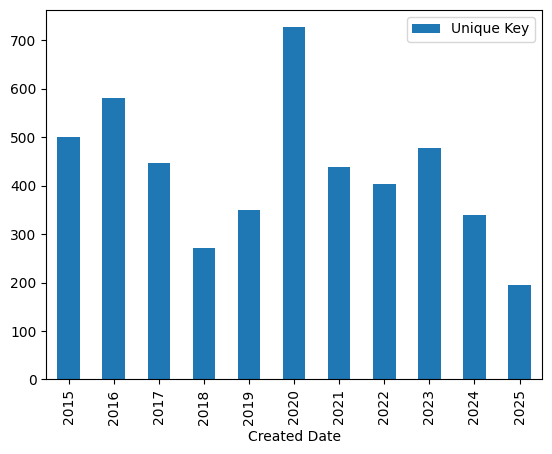

In [95]:
#let's take a look at some breakdowns for each borough
Manhattan_complaints = df_cleaned[df_cleaned['Borough'] == 'MANHATTAN']

#How does it change year over year in Manhattan? 
Manhattan_complaints_year = Manhattan_complaints.groupby(Manhattan_complaints['Created Date'].dt.year)['Unique Key'].count().to_frame()
Manhattan_complaints_year.plot(kind = 'bar')

<Axes: xlabel='Created Date'>

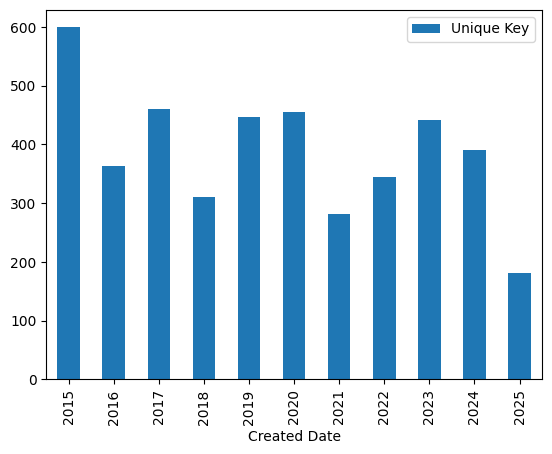

In [96]:
#I'll do the same for each borough

Brooklyn_complaints = df_cleaned[df_cleaned['Borough'] == 'BROOKLYN']

Brooklyn_complaints_year = Brooklyn_complaints.groupby(Brooklyn_complaints['Created Date'].dt.year)['Unique Key'].count().to_frame()
Brooklyn_complaints_year.plot(kind = 'bar')

#interesting...Brooklyn really peaked in 2015

<Axes: xlabel='Created Date'>

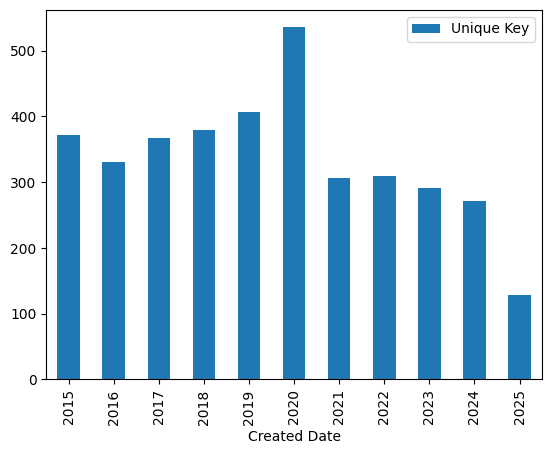

In [97]:
Queens_complaints = df_cleaned[df_cleaned['Borough'] == 'QUEENS']

Queens_complaints_year = Queens_complaints.groupby(Queens_complaints['Created Date'].dt.year)['Unique Key'].count().to_frame()
Queens_complaints_year.plot(kind = 'bar')

#much more consistent overall trend

<Axes: xlabel='Created Date'>

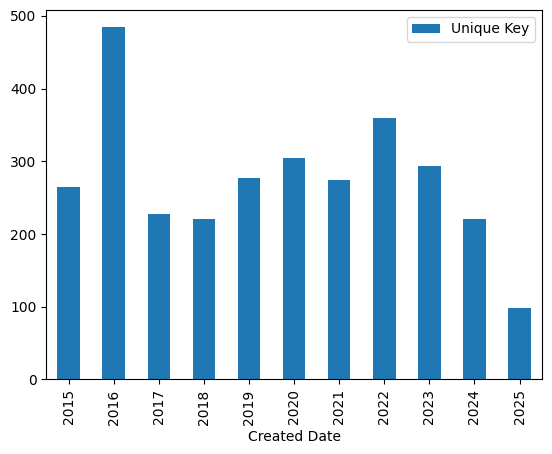

In [98]:
Bronx_complaints = df_cleaned[df_cleaned['Borough'] == 'BRONX']

Bronx_complaints_year = Bronx_complaints.groupby(Bronx_complaints['Created Date'].dt.year)['Unique Key'].count().to_frame()
Bronx_complaints_year.plot(kind = 'bar')

<Axes: xlabel='Created Date'>

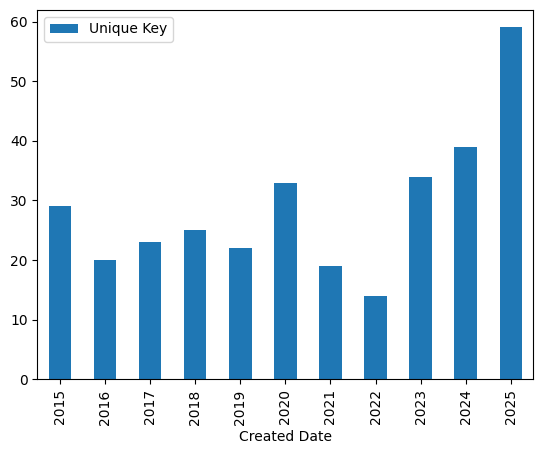

In [100]:
SI_complaints = df_cleaned[df_cleaned['Borough'] == 'STATEN ISLAND']

SI_complaints_year = SI_complaints.groupby(SI_complaints['Created Date'].dt.year)['Unique Key'].count().to_frame()
SI_complaints_year.plot(kind = 'bar')

#OK, that's different...SI complaints peaked this year by far an it's only June?! Gonna have to look into that

In [103]:
keepers = ['Latitude', 'Longitude']
SI_complaints_loc = SI_complaints[keepers]
SI_complaints_loc.to_csv('SI_complaints_loc.csv')

In [129]:
SI_complaints_2025 = SI_complaints[SI_complaints['Created Date'].dt.year == 2025]
SI_complaints_2025.head()
SI_complaints_2025_loc = SI_complaints_2025[keepers]
SI_complaints_2025_loc.to_csv('SI_complaints_2025_loc.csv')

<Axes: xlabel='Created Date'>

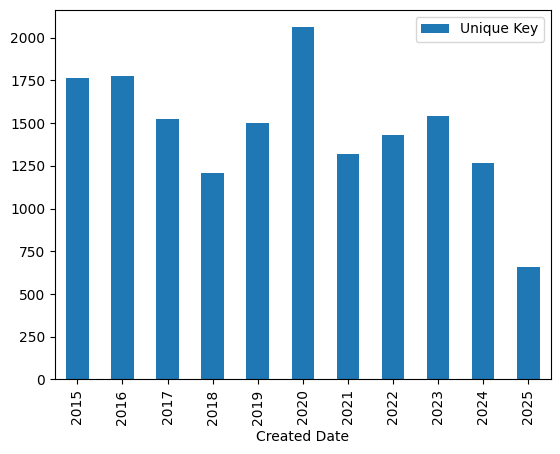

In [101]:
#Look at the overall for NYC

NYC_complaints_year = df_cleaned.groupby(df_cleaned['Created Date'].dt.year)['Unique Key'].count().to_frame()
NYC_complaints_year.plot(kind = 'bar')

In [231]:
NYC_complaints_year.to_csv('citywide_complaints_by_year.csv')

In [232]:
#Average complaints per year city wide? 
NYC_complaints_year.median()

Unique Key    1501.0
dtype: float64

In [19]:
#I want to know which neighborhoods have the most complaints. But they don't have that here. But I could use the community boards and match with another dataset
neighborhoods = pd.read_csv('NYC_Community_Boards.csv')
neighborhoods.head()

#This is way more info than I need for this. I'll get rid of most of these columns
columns_keep = ['Borough', 'Community Board', 'Neighborhoods']
neighborhoods_cleaned = neighborhoods[columns_keep]
neighborhoods_cleaned.head()


,Borough,Community Board,Neighborhoods
0,Bronx,Community Board 9,"Parkchester, Westchester Square, Unionport, So..."
1,Manhattan,Community Board 9,"Hamilton Heights, Manhattanville, Morningside ..."
2,Queens,Community Board 9,"Richmond Hill, Woodhaven, Ozone Park, and Kew ..."
3,Brooklyn,Community Board 9,"Crown Heights, Prospect Lefferts Gardens, and ..."
4,Brooklyn,Community Board 8,"Crown Heights, Prospect Heights, and Weeksville"


In [20]:
#Ok, much better. But this info is formatted differently in the ice cream complaints dataframe. For one thing, the borough and community board need to be in the same column
# let's make a new column where they're combined
#neighborhoods_cleaned['borough_board'] = neighborhoods_cleaned['Community Board'] + ' ' + neighborhoods_cleaned['Borough']
#neighborhoods_cleaned.head()

In [21]:
#Well, that worked, but it's still not formated correctly. Let's see if we can merge it like this
#neighborhood_boards = df_cleaned.merge(neighborhoods_cleaned, left_on ='Community Board', right_on = 'borough_board')
#nope, as expected, that did not work. Let's try to figure out how to format it correctly 

In [22]:
#Ok, so first, I want just the number of the community board
neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board'].str.replace('Community Board ', '')
neighborhoods_cleaned.head()  

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/4077550739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board'].str.replace('Community Board ', '')


,Borough,Community Board,Neighborhoods,Community Board #
0,Bronx,Community Board 9,"Parkchester, Westchester Square, Unionport, So...",9
1,Manhattan,Community Board 9,"Hamilton Heights, Manhattanville, Morningside ...",9
2,Queens,Community Board 9,"Richmond Hill, Woodhaven, Ozone Park, and Kew ...",9
3,Brooklyn,Community Board 9,"Crown Heights, Prospect Lefferts Gardens, and ...",9
4,Brooklyn,Community Board 8,"Crown Heights, Prospect Heights, and Weeksville",8


In [23]:
#Cool, it's an integer, now I need to make them all two digits
neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board #'].str.zfill(2)
neighborhoods_cleaned.head()

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/1585314889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board #'].str.zfill(2)


,Borough,Community Board,Neighborhoods,Community Board #
0,Bronx,Community Board 9,"Parkchester, Westchester Square, Unionport, So...",09
1,Manhattan,Community Board 9,"Hamilton Heights, Manhattanville, Morningside ...",09
2,Queens,Community Board 9,"Richmond Hill, Woodhaven, Ozone Park, and Kew ...",09
3,Brooklyn,Community Board 9,"Crown Heights, Prospect Lefferts Gardens, and ...",09
4,Brooklyn,Community Board 8,"Crown Heights, Prospect Heights, and Weeksville",08


In [24]:
#Hooray! Ok, now I just need add the borough after the number 
neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board #'] + ' ' + (neighborhoods_cleaned['Borough'].str.upper())

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/3121389038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhoods_cleaned['Community Board #'] = neighborhoods_cleaned['Community Board #'] + ' ' + (neighborhoods_cleaned['Borough'].str.upper())


In [25]:
neighborhoods_cleaned.head()
# Don't actually need the Borough and Community board columns anymore so I'll get rid of those 
neighborhoods_cleaned = neighborhoods_cleaned.drop(['Borough', 'Community Board'], axis = 1)
neighborhoods_cleaned.head()

,Neighborhoods,Community Board #
0,"Parkchester, Westchester Square, Unionport, So...",09 BRONX
1,"Hamilton Heights, Manhattanville, Morningside ...",09 MANHATTAN
2,"Richmond Hill, Woodhaven, Ozone Park, and Kew ...",09 QUEENS
3,"Crown Heights, Prospect Lefferts Gardens, and ...",09 BROOKLYN
4,"Crown Heights, Prospect Heights, and Weeksville",08 BROOKLYN


In [26]:
# I did it! *sigh* Not done...all that work just to merge these tables
icecream_neighborhoods = df_cleaned.merge(neighborhoods_cleaned, left_on = 'Community Board', right_on = 'Community Board #')

In [27]:
icecream_neighborhoods.head()
# Yay!!!

,Unique Key,Created Date,hour,Closed Date,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Location,Neighborhoods,Community Board #
0,65322826,2025-06-20 20:50:00,20,NaT,11102.0,NaN,NaN,NaN,NaN,VERNON BOULEVARD,31 AVENUE,NaN,NaT,01 QUEENS,QUEENS,40.769525,-73.935225,POINT (-73.93522548140903 40.769524718686306),"Astoria, Old Astoria, Long Island City, Queens...",01 QUEENS
1,65318834,2025-06-20 20:14:00,20,NaT,10027.0,101 WEST 126 STREET,WEST 126 STREET,LENOX AVE,ADAM CLAYTON POWELL JR BLVD,NaN,NaN,NaN,NaT,10 MANHATTAN,MANHATTAN,40.808651,-73.945457,POINT (-73.94545728674434 40.808650683577945),Central Harlem,10 MANHATTAN
2,65320152,2025-06-20 18:08:00,18,NaT,10306.0,103 MORELAND STREET,MORELAND STREET,HUNTER AVE,BEDFORD AVE,NaN,NaN,The Department of Environmental Protection has...,2025-06-20 21:20:00,02 STATEN ISLAND,STATEN ISLAND,40.576601,-74.095042,POINT (-74.09504164788694 40.57660088143584),"Arrochar, Bloomfield, Bulls Heads, Chelsea, Do...",02 STATEN ISLAND
3,65322827,2025-06-20 16:56:00,16,NaT,10306.0,NaN,NaN,NaN,NaN,HAMDEN AVENUE,MASON AVENUE,NaN,NaT,02 STATEN ISLAND,STATEN ISLAND,40.576553,-74.096082,POINT (-74.09608191915893 40.57655335443296),"Arrochar, Bloomfield, Bulls Heads, Chelsea, Do...",02 STATEN ISLAND
4,65318835,2025-06-20 12:56:00,12,NaT,10003.0,NaN,NaN,NaN,NaN,2 AVENUE,EAST 14 STREET,NaN,NaT,03 MANHATTAN,MANHATTAN,40.732351,-73.984947,POINT (-73.98494657742124 40.73235061714299),"Tompkins Square, East Village, Lower East Side...",03 MANHATTAN


In [28]:
# Now then, let's see which neighborhood hates ice cream the most....
icecream_neighborhoods.groupby('Neighborhoods')['Unique Key'].count().sort_values(ascending = False)

Neighborhoods
Washington Heights                                                                                                                                                                                                                                                                                                           915
Fieldston, Kingsbridge, Kingsbridge Heights, Marble Hill, Riverdale, Spuyten Duyvil, and Van Cortlandt Village                                                                                                                                                                                                               723
Morris Park, Pelham Parkway, Pelham Gardens, Allerton, Bronxdale, Laconia and Van Nest                                                                                                                                                                                                                                       567
Flushing, Bay Terrace, 

In [29]:
# WHAT???!!! Washington Heights hates ice cream the most?! That is my own neighborhood. I have never felt so betrayed
# I'm gonna save this as it's own dataframe for later
icecream_Heights = icecream_neighborhoods[icecream_neighborhoods['Neighborhoods'] == 'Washington Heights']

In [30]:
icecream_Heights.shape

(915, 20)

In [31]:
icecream_Heights.head()

,Unique Key,Created Date,hour,Closed Date,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Resolution Description,Resolution Action Updated Date,Community Board,Borough,Latitude,Longitude,Location,Neighborhoods,Community Board #
97,65138887,2025-06-02 18:41:00,18,2025-06-03 20:00:00,10033.0,NaN,NaN,NaN,NaN,HAVEN AVENUE,WEST 173 STREET,The Department of Environmental Protection (DE...,2025-06-03 20:00:00,12 MANHATTAN,MANHATTAN,40.846246,-73.942611,POINT (-73.94261085719263 40.84624641081894),Washington Heights,12 MANHATTAN
119,65123399,2025-05-31 17:47:00,17,2025-06-07 10:45:00,10040.0,4451 BROADWAY,BROADWAY,FAIRVIEW AVE,W 192 ST,NaN,NaN,The Department of Environmental Protection (DE...,2025-06-07 10:45:00,12 MANHATTAN,MANHATTAN,40.857093,-73.932443,POINT (-73.93244342839955 40.85709346450945),Washington Heights,12 MANHATTAN
143,65098097,2025-05-29 17:05:00,17,2025-06-05 17:00:00,10033.0,NaN,NaN,NaN,NaN,WEST 174 STREET,FT WASHINGTON AVENUE,The Department of Environmental Protection (DE...,2025-06-05 17:00:00,12 MANHATTAN,MANHATTAN,40.846048,-73.940240,POINT (-73.9402400014605 40.84604758805665),Washington Heights,12 MANHATTAN
148,65089629,2025-05-28 17:08:00,17,2025-06-09 17:00:00,10040.0,NaN,NaN,NaN,NaN,AMSTERDAM AVENUE,WEST 188 STREET,The Department of Environmental Protection (DE...,2025-06-09 17:00:00,12 MANHATTAN,MANHATTAN,40.852488,-73.927695,POINT (-73.9276947480756 40.85248771963391),Washington Heights,12 MANHATTAN
149,65088505,2025-05-28 16:23:00,16,2025-06-04 18:00:00,10033.0,NaN,NaN,NaN,NaN,WADSWORTH AVENUE,WEST 181 STREET,The Department of Environmental Protection (DE...,2025-06-04 18:00:00,12 MANHATTAN,MANHATTAN,40.849841,-73.934967,POINT (-73.93496654033319 40.849840663730916),Washington Heights,12 MANHATTAN


In [32]:
# I want to map these, but maybe just the ones from this 

In [33]:
keepers = ['Latitude', 'Longitude']
Heights_complaints_locations = icecream_Heights[keepers]
Heights_complaints_locations.head()
Heights_complaints_locations.to_csv('Heights_complaints_locations.csv', index = False)

In [83]:
# Just curious what years had the most complaints. 2020 makes sense...everyone was home and cranky
icecream_Heights_years = icecream_Heights.groupby(icecream_Heights['Created Date'].dt.year)['Unique Key'].count().to_frame()
icecream_Heights_years

,Unique Key
Created Date,
2015,131
2016,143
2017,78
2018,24
2019,90
2020,214
2021,89
2022,47
2023,39


<Axes: xlabel='Created Date'>

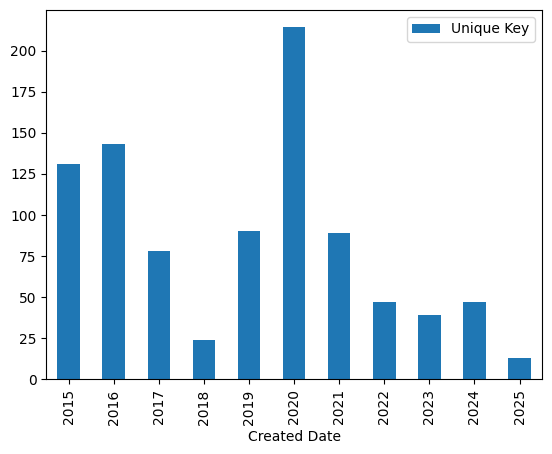

In [87]:
icecream_Heights_years.plot(kind = 'bar')

In [52]:
# How are these complaints being resolved?
icecream_Heights['Resolution Description'].value_counts(dropna = False).to_frame()

#Wow, only 13 summons were issued! At least the goverment doesn't hate ice cream trucks 

,count
Resolution Description,
"The Department of Environmental Protection (DEP) didn't observe a violation of the NYC Air or Noise Code at the time of inspection and couldn't issue a summons. If the problem still exists, please go to nyc.gov/311 or call 311 to file a new Service Request. If you're outside of New York City, please call (212) NEW-YORK (212-639-9675).",702
The Department of Environmental Protection determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.,130
"The Department of Environmental Protection requires an appointment to inspect this complaint type. Complainant information was not provided and an appointment could not be scheduled. The complaint has been closed. If the problem still exists, please call 311 and file a new complaint including your contact information.",27
The Department of Environmental Protection researched this complaint and determined that it could be closed.,16
The Department of Environmental Protection (DEP) observed a violation of the NYC Air or Noise Code during the inspection. DEP issued a summons.,13
The Department of Environmental Protection has inspected your complaint and determined that further investigation is required. More information will be available once the condition is resolved. Please visit nyc.gov/311 or call 311 at a later time to check the status of your complaint.,13
The Department of Environmental Protection requires contact with the complainant to investigate this complaint. The complaint was closed because attempts made to contact the complainant by phone and/or letter received no response.,11
NaN,2
"The status of this Service Request is currently not available online. Please call 311 for further assistance. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).",1


In [70]:
# let's look at just the complaints that resulted in a summons
Heights_summons = icecream_Heights[icecream_Heights['Resolution Description'].str.contains('issued a summons') == True]

In [72]:
Heights_summons.shape

(13, 20)

In [75]:
# I want to map these
Heights_summons_loc = Heights_summons[keepers]
Heights_summons_loc.to_csv('Heights_summons_loc.csv')

In [76]:
Heights_summons.groupby(Heights_summons['Created Date'].dt.year)['Unique Key'].count()

Created Date
2015    1
2017    1
2019    2
2020    3
2021    2
2022    1
2024    3
Name: Unique Key, dtype: int64

In [132]:
#What percentage of complaints resulted in a summons
icecream_summons = icecream_neighborhoods[icecream_neighborhoods['Resolution Description'].str.contains('issued a summons') == True]
icecream_summons.shape

(122, 20)

In [133]:
icecream_neighborhoods.shape

(15619, 20)

In [234]:
(122/15619)*100


0.7810999423778731

In [135]:
#What percentage of complaints in Washington Heights resulted in a summons? 
icecream_Heights.shape

(915, 20)

In [233]:
13/915 *100

1.4207650273224044

In [177]:
dep_complaints = pd.read_csv('DEP_Complaints.csv')

/var/folders/xs/c_4kjb4j5q9bjbh4l5y3p9g40000gn/T/ipykernel_39944/3698880837.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dep_complaints = pd.read_csv('DEP_Complaints.csv')


In [217]:
dep_complaints.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,65380942,06/26/2025 11:59:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10003.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730564,-73.990507,POINT (-73.99050707261846 40.730564374374765)
1,65384758,06/26/2025 11:59:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11102.0,24 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65383493,06/26/2025 11:44:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11436.0,145-01 119 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678296,-73.795620,POINT (-73.79562019364744 40.67829584776961)
3,65388582,06/26/2025 11:44:00 PM,NaN,DEP,Department of Environmental Protection,Noise,"Noise, Barking Dog (NR5)",NaN,11213.0,1492 PARK PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672177,-73.927551,POINT (-73.92755136093196 40.67217725615196)
4,65380938,06/26/2025 11:26:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11102.0,21-10 24 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.776496,-73.921372,POINT (-73.92137206415107 40.77649597017256)


In [196]:
type_counts = dep_complaints.Descriptor.value_counts().to_frame()
type_counts.reset_index()

,Descriptor,count
0,Noise: Construction Before/After Hours (NM1),244884
1,Noise: Construction Equipment (NC1),80053
2,"Noise, Barking Dog (NR5)",72930
3,Noise: Alarms (NR3),48647
4,Noise: air condition/ventilation equipment (NV1),45234
5,Noise: Jack Hammering (NC2),29943
6,"Noise, Ice Cream Truck (NR4)",16072
7,Noise: Private Carting Noise (NQ1),11605
8,Noise: lawn care equipment (NCL),8146
9,"Noise: Boat(Engine,Music,Etc) (NR10)",2782


In [203]:
construction = type_counts.iloc[0] + type_counts.iloc[1] + type_counts.iloc[5]

In [209]:
#What percentage of noise complaints are related to construction? 
construction/type_counts.sum() *100

count    62.724914
dtype: float64

In [214]:
#I would like to know if constuction complaints reult in summons at a higher rate
#first I'm going to separate out the construction related complaints
dep_construction_complaints = dep_complaints[dep_complaints['Descriptor'].str.contains('Construction')| dep_complaints['Descriptor'].str.contains('Jack')]
dep_construction_complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,65380942,06/26/2025 11:59:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10003.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730564,-73.990507,POINT (-73.99050707261846 40.730564374374765)
2,65383493,06/26/2025 11:44:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11436.0,145-01 119 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678296,-73.795620,POINT (-73.79562019364744 40.67829584776961)
5,65386048,06/26/2025 11:23:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11221.0,44 LINDEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691046,-73.921696,POINT (-73.92169640035722 40.69104648446796)
6,65383494,06/26/2025 11:08:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11232.0,825 4 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.657913,-74.000652,POINT (-74.00065235599091 40.65791349539486)
7,65387300,06/26/2025 11:02:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11234.0,4011 FILLMORE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.613353,-73.930129,POINT (-73.9301292399039 40.613352599834315)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565754,29618667,01/02/2015 02:54:00 AM,01/05/2015 10:45:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10007.0,165 CHURCH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715150,-74.007752,POINT (-74.0077520269982 40.71514994344327)
565755,29621200,01/02/2015 02:50:00 AM,01/05/2015 10:45:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10007.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714928,-74.007940,POINT (-74.00793957864515 40.714927605024464)
565756,29623730,01/02/2015 12:40:00 AM,01/12/2015 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.841370,-73.826085,POINT (-73.82608501476821 40.84137025109151)
565768,29616228,01/01/2015 03:46:00 PM,01/09/2015 06:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11361.0,39-30 223 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766330,-73.760647,POINT (-73.76064657926747 40.76632998017685)


In [215]:
#making sure I got them all 
dep_construction_complaints.Descriptor.value_counts()

#looks good, matches the complaints count above

Descriptor
Noise: Construction Before/After Hours (NM1)    244884
Noise: Construction Equipment (NC1)              80053
Noise: Jack Hammering (NC2)                      29943
Name: count, dtype: int64

In [218]:
#let's see how many of these resulted in a summons
dep_construction_complaints['Resolution Description'].value_counts()

Resolution Description
The Department of Environmental Protection (DEP) didn't observe a violation of the NYC Air or Noise Code at the time of inspection and couldn't issue a summons.  If the problem still exists, please go to nyc.gov/311 or call 311 to file a new Service Request. If you're outside of New York City, please call (212) NEW-YORK (212-639-9675).    241620
The Department of Environmental Protection determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.                                                                                                                                                                                  91477
The Department of Environmental Protection (DEP) observed a violation of the NYC Air or Noise Code during the inspection. DEP issued a summons.                                                                                                                                          

In [222]:
construction_summons= dep_construction_complaints[dep_construction_complaints['Resolution Description'].str.contains('issued a summons')== True]
len(construction_summons)

6867

In [224]:
#What's the percentage? 
len(construction_summons)/ len(dep_construction_complaints) *100

#That's almost 2% of complaints, way higher than icecream truck complaints

1.9350202885482417

In [228]:
len(df_cleaned)/len(dep_complaints) *100

2.8363015490338865